<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Linear_Regression_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Courtesy: https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/

In [10]:
#Linear Regression: Supervised Learning, targeting prediction value based on independent variables, finding out the relation between variables and forcasting
#Required libraries
%pip install seaborn==0.11.0 #older versioon for suppoting some obselete features
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [11]:
#Reading from dataset
df = pd.read_csv('bottle.csv')
df_binary = df[['sal_bot', 'temp']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()


,Sal,Temp
0,35.214,8.253
1,35.232,8.276
2,35.223,8.232
3,35.215,8.178
4,35.200,8.100


TypeError: Could not convert string '8.2538.2768.2328.1788.1008.1068.0977.8317.3285.1074.3693.9369.5449.3309.3029.2929.2829.2618.1256.8165.9884.5494.0023.809ndndndndndnd12.60112.60312.60912.60612.61212.61512.45612.34212.21711.97611.40611.08912.66112.64512.62512.62412.62212.39411.79410.8569.2598.1394.3813.648ndndndndndnd12.59512.60012.60212.57512.56312.54512.49912.19812.08111.97311.77611.02712.58812.59212.48412.41412.07211.97211.51111.02810.7398.1934.3263.696ndndndndndnd12.61012.61012.60212.59112.54612.45212.44012.29512.12111.86611.64610.94912.57112.55912.54312.54212.52912.36912.33912.26412.13311.90911.28910.79212.55712.53212.43812.43212.40412.36212.36612.30612.25411.94811.55311.038ndndndndndnd12.66212.50112.46612.42412.32312.12412.02711.1499.9248.5584.6273.673ndndndndndnd12.55512.55212.54412.53912.51712.47812.42312.27712.26812.04311.73311.13012.68012.55312.54112.53312.51812.30411.91310.8299.6657.8444.4434.004ndndndndndnd12.69712.66512.59012.57712.54012.54612.33512.17812.04211.42011.31210.99612.78812.78812.57912.56512.53112.38612.28712.17912.08811.46411.39711.129ndndndndndnd12.27412.13612.09412.06512.03211.96811.69811.24512.65212.65912.61912.42012.25112.20912.09512.01012.00611.79411.24710.959ndndndndndnd12.45212.45212.10212.07112.04812.03612.02011.98611.94911.47610.97810.80312.90612.41712.27712.07712.06412.03912.02611.94511.83611.64911.09810.8734.5984.5984.6004.5984.5983.7063.7073.7033.7033.7023.7053.705ndndndndndnd12.86312.54412.26712.14712.07912.06712.02911.99211.94411.82211.04310.86312.60212.51312.04511.99111.97011.96611.96511.96111.93111.89311.17010.872ndndndndndnd12.49512.48812.42312.27612.06712.01511.98311.94711.92111.75810.93110.72412.54512.43612.31712.03812.01611.95311.90811.86110.89310.5218.7474.53410.53510.53510.53410.53410.5349.1949.1999.1949.2019.1924.7513.719ndndndndndnd13.23113.14512.46612.41612.39212.33612.23912.08912.05312.00111.95511.908ndndndndndnd13.12212.70912.53612.31811.97211.72711.67111.55611.48911.21410.75610.30113.00912.99812.36912.28012.28312.06011.40810.2348.2327.2874.2103.61313.10413.08113.08112.89312.68912.60112.42312.12511.99611.79911.58911.18013.12713.04412.17311.91211.78811.74311.63811.50611.42011.17110.67910.1998.7428.7408.7407.0006.9996.9946.9894.0574.0564.0554.0534.054ndndndndndnd13.00812.95912.19511.94811.83411.73311.66911.47411.44411.38111.18110.66113.02613.06112.59412.53212.28612.15812.02611.97511.69711.42711.27410.64214.80314.06313.89513.73613.66913.45913.28012.48211.7939.4088.9844.816ndndndndndndndnd11.22910.3129.3228.4727.9165.8984.4793.8773.6423.5243.0242.73613.73113.58813.57413.29013.17513.09512.96212.32412.26812.20312.01011.82513.76213.71813.20112.86012.53612.33112.23412.19412.13211.98811.78911.40213.73613.69613.34912.97112.43512.29212.24012.19211.3499.3269.3209.32013.80113.69213.50413.11212.68512.48212.30512.22312.10012.04612.01611.79814.12214.11413.36112.88612.35512.23412.18412.03711.90011.41711.30410.774ndndndndndndndnd13.81713.81013.81013.01212.74012.40012.14112.07511.98411.79111.63211.43313.66013.65913.62313.31412.80112.57812.33612.22512.04011.95211.74111.44714.00813.35913.32113.29213.27313.18312.79712.13611.99611.88411.8147.5174.2104.2054.1994.2104.1974.2093.6273.6263.6263.6253.6253.627ndndndndndndndndndndndnd13.56213.47513.42713.28313.19112.89112.25612.06011.95911.90411.74711.54811.85411.36910.7039.2248.8968.3065.4844.1273.6143.2612.8332.63013.83113.80513.42913.26012.93212.26012.06412.00011.89411.85211.74111.613ndnd13.56613.56613.52512.91212.88012.30412.22412.12512.07111.98111.93811.766ndndndnd13.75110.66610.6069.1389.1539.1299.1548.2918.2958.2928.2868.2878.256ndndndndndndndndnd13.75913.72813.72612.92012.83812.62212.30712.23412.17812.13011.97711.740ndndndnd9.5458.6588.5108.7195.3173.7383.4253.2062.9922.8362.7402.60613.64713.63913.11912.95112.86012.34512.26712.23612.14212.12312.07711.876ndnd13.58513.58113.57913.35212.58012.36912.34212.29412.27012.24712.11711.974ndndndndndndndndndndndndndndndndnd13.59613.58213.59513.57813.35813.25412.85312.33812.27412.26612.20611.99113.75512.29212.02311.38110.64810.2149.2158.8138.1678.2634.3503.6493.6463.6463.64913.67213.65913.64813.35013.17712.62312.38312.28012.28312.26012.21812.01210.36710.36510.3698.3818.3788.3078.2964.1844.1854.1864.1844.184ndnd13.60913.60713.60213.58613.30113.09912.70912.37812.24812.24212.14311.949ndndndndndndnd13.89413.85713.83513.44613.19812.93712.55112.28312.23812.21912.10611.97113.95813.96013.95413.45513.25212.95312.72812.32012.24512.20412.05711.87113.88010.8889.6343.7613.2843.2833.2823.2813.2783.2753.2753.2753.27513.80313.75313.74613.79913.55513.00112.89912.43612.23712.12511.96111.56013.61613.61613.37512.99112.82212.46412.12611.65611.44611.37311.01910.513ndndndndndndndnd14.10413.91613.64313.40512.76612.69812.44312.12711.75511.37210.6838.17214.38111.68211.38510.6759.7378.4088.6328.2158.0045.5674.4963.6403.64114.31314.02613.92413.57112.84612.60612.40012.19012.10711.94411.91411.676ndndndndndndndndndnd12.2707.3906.6626.1455.2094.2593.7733.7733.7733.7733.6223.5433.4003.4003.4003.4003.066ndndndndndndndndndndndndnd9.2439.2299.1878.5738.4767.0265.9633.7883.6073.5503.4303.1472.837ndndndndndndndndndndnd9.9599.9209.6469.3339.2479.2129.1269.0389.0068.8848.8058.7129.6948.3028.2208.1327.9207.2354.4133.8643.8633.8643.8643.8649.8119.7569.5949.3099.1819.0889.1639.0128.7588.4188.3538.304' to numeric

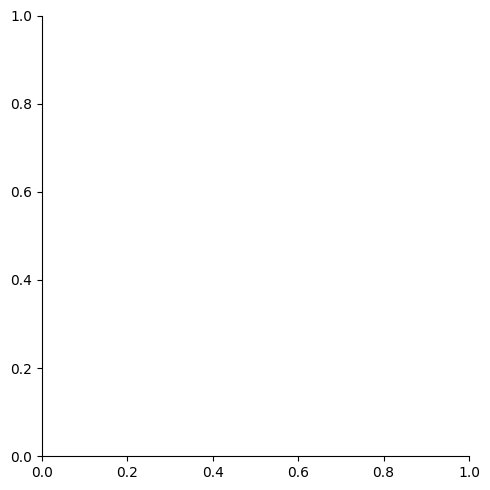

In [12]:
#Ploting relationship between Sal and Temp using Seaborn
#Exploring the data scatter
sns.lmplot(x="Sal", y="Temp", data = df_binary, order=2, ci=None) #l(L)mplot
plt.show()
#

<ipython-input-13-15f2372bf49f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Sal'] = pd.to_numeric(df_binary['Sal'], errors='coerce')
<ipython-input-13-15f2372bf49f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Temp'] = pd.to_numeric(df_binary['Temp'], errors='coerce')


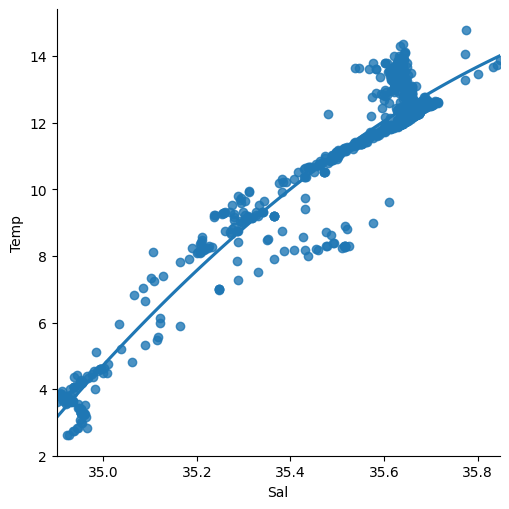

In [13]:
#Reading from dataset
df = pd.read_csv('bottle.csv')
df_binary = df[['sal_bot', 'temp']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']

# Convert 'Sal' and 'Temp' columns to numeric, coercing errors to NaN
df_binary['Sal'] = pd.to_numeric(df_binary['Sal'], errors='coerce')
df_binary['Temp'] = pd.to_numeric(df_binary['Temp'], errors='coerce')

# Drop rows with NaN values in 'Sal' or 'Temp'
df_binary = df_binary.dropna(subset=['Sal', 'Temp'])

#display the first 5 rows
df_binary.head()

#Ploting relationship between Sal and Temp using Seaborn
#Exploring the data scatter
sns.lmplot(x="Sal", y="Temp", data = df_binary, order=2, ci=None) #l(L)mplot
plt.show()

In [14]:
#data cleaning
df_binary.fillna(method='ffill', inplace=True)

<ipython-input-14-1e75219cc7d3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method='ffill', inplace=True)


In [16]:
# Training our Model
X= np.array(df_binary['Sal']).reshape(-1,1)  #Feature Metrics
y= np.array(df_binary['Temp']).reshape(-1,1) #Target Vector
#Convert each dataframe into a numpy array since each dataframe contain only one column
df_binary.dropna(inplace=True) #Droping any row with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) #Splitting data into training and testing
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9263384608225383


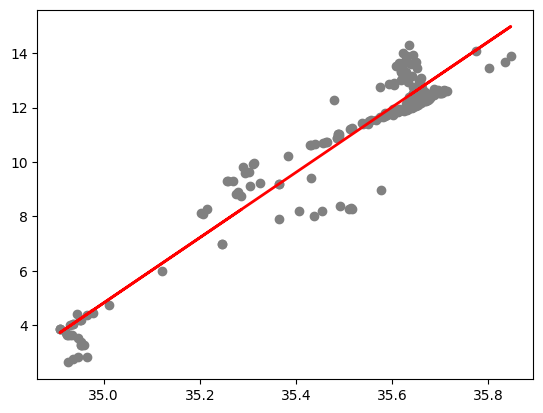

In [19]:
#Exploring results
y_pred = regr.predict(X_test)
# df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# df_pred
plt.scatter(X_test, y_test, color='gray') #Data scatter of predicted values
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


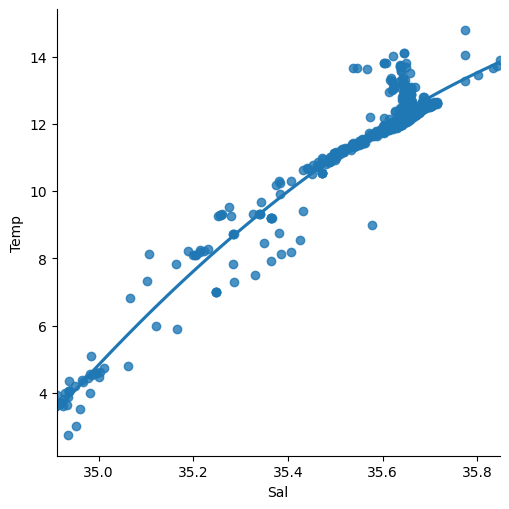

In [28]:
df_binary500=df_binary[:][:500] #Selecting the first 500 rows from the data
sns.lmplot(x="Sal", y="Temp", data = df_binary500, order=2, ci=None)
plt.show()

In [30]:
df_binary500.fillna(method ='ffill', inplace = True)

X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.9351392480825982


<ipython-input-30-3ea5d485cf51>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary500.fillna(method ='ffill', inplace = True)


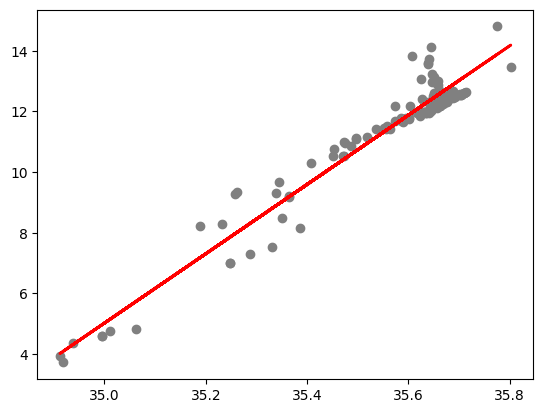

In [31]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='gray')
plt.plot(X_test, y_pred, color ='red', linewidth = 2)
plt.show()

In [34]:
#Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred) #Mean Absolute Error
mse=mean_squared_error(y_test,y_pred) #Mean Squared Error
rmse=np.sqrt(mse)   #root mean square error

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)

Mean Absolute Error: 0.4337346576890171
Mean Squared Error: 0.3129796278257499
Root Mean Squared Error: 0.5594458220647911


#Gradient Descent in Linear Regression

#####Algorithm involving Gradient Descent in Linear Regression

- Step 1: Initialize the parameters of the model randomly
- Step 2: Compute the gradient of the cost function w.r.t each parameters (partial differentiation of cost function w.r.t the parameters)
- Step 3: Update the parameters of the model by taking steps in the opposite direction of the model (the step size of the gradient)
- Step 4: Repeat steps 2, and 3 iteratively to get the best paramter for the defined model

=> One by one functions

i) gradient_descent

ii) compute_predictions

iii) compute_gradient

iv) update_parameters

- -> θj     : Weights of the hypothesis.
- -> hθ(xi) : predicted y value for ith input.
- -> i     : Feature index number (can be 0, 1, 2, ......, n).
- -> α     : Learning Rate of Gradient Descent.

In [35]:
#Impelementation of gradient descent in linear regression
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

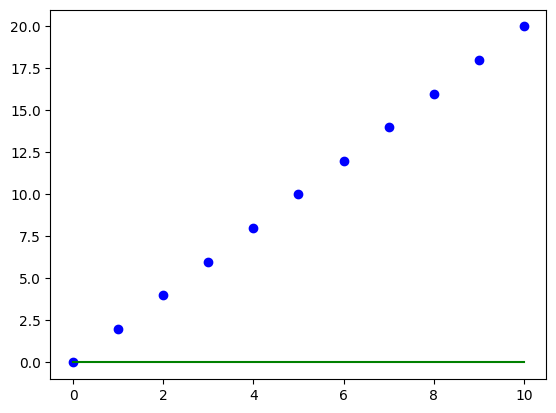

100 epochs elapsed
The current accuracy is:  0.9836456109008862
Do you want to stop (y/*))?*
200 epochs elapsed
The current accuracy is:  0.9876439126076564
Do you want to stop (y/*))?ij
300 epochs elapsed
The current accuracy is:  0.99066471424142


KeyboardInterrupt: Interrupted by user

In [36]:
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b=[0,0]

    def update_coeffs(self, learning_rate):
      Y_pred=self.predict()
      Y=self.Y
      m=len(Y)
      self.b[0]=self.b[0]-(learning_rate*((1/m)*np.sum(Y_pred-Y)))
      self.b[1]=self.b[1]-(learning_rate*((1/m)*np.sum((Y_pred-Y)*self.X)))

    def predict(self, X=[]):
      Y_pred=np.array([])
      if not X:
        X=self.X
      b = self.b
      for x in X:
        Y_pred=np.append(Y_pred, b[0]+b[1]*x)
      return Y_pred

    def get_current_accuracy(self, Y_pred):
      p, e = Y_pred, self.Y
      n=len(Y_pred)
      return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

    def compute_cost(self, Y_pred):
      m = len(self.Y)
      return (1/2*m)*sum([(Y_pred[i]-self.Y[i])**2 for i in range(m)])

    def plot_best_fit(self, Y_pred, fig):
      f = plt.figure(fig)
      plt.scatter(self.X, self.Y, color='b')
      plt.plot(self.X, Y_pred, color='g')
      plt.show()


def main():
  X=np.array([i for i in range(11)])
  Y=np.array([2*i for i in range(11)])
  regressor = Linear_Regression(X, Y)

  iterations = 0
  steps = 100
  learning_rate = 0.01
  costs = []

  #Original best-fit line
  Y_pred = regressor.predict()
  regressor.plot_best_fit(Y_pred, "Intial Best Fit Line")

  while 1:
    Y_pred = regressor.predict()
    cost = regressor.compute_cost(Y_pred)
    costs.append(cost)
    regressor.update_coeffs(learning_rate)
    iterations += 1
    if iterations % steps == 0:
      print(iterations, "epochs elapsed")
      print("The current accuracy is: ", regressor.get_current_accuracy(Y_pred))

      stop = input("Do you want to stop (y/*))?")
      if stop == 'y':
        break
  #Final best-fit line
  Y_pred = regressor.predict()
  regressor.plot_best_fit(Y_pred, "Final Best Fit Line")

  # plot to verify cost function decreases:
  h = plt.figure('Verification')
  plt.plot(range(iterations), costs, color='b')
  plt.show()

  # if user wants to predict using the regressor:
  regressor.predict([i for i in range(10)])


if __name__ == '__main__':
  main()
